In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon 
import json
import os
from PIL import Image,ImageDraw
import cv2
from tqdm import tqdm

In [2]:
res_path = r'/home/cgiuser/rushikesh/projects/boundry_patch_refinement/code/script/results/'
res_file = os.listdir(res_path)
res_file[:3]

['quarter_window_front_right#6#22C8456B-C5C4-4D37-BF7F-A41CC0FC2E67.jpg',
 'rear_bumper#31#850E47CB-2EC6-4110-00FD-4C008982C953.jpg',
 'tyre_front_left#22#29C8A7D4-8F1A-4B05-9551-5E35F03BE6DD.jpg']

quarter_window_front_right#6#22C8456B-C5C4-4D37-BF7F-A41CC0FC2E67.jpg


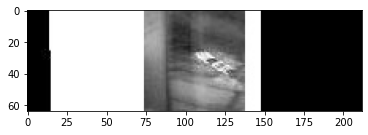

rear_bumper#31#850E47CB-2EC6-4110-00FD-4C008982C953.jpg


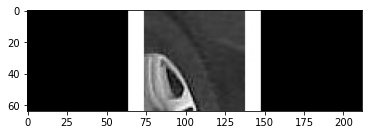

tyre_front_left#22#29C8A7D4-8F1A-4B05-9551-5E35F03BE6DD.jpg


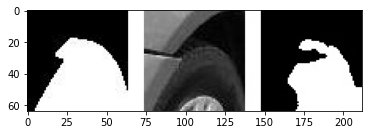

bonnet#33#car#33.jpg


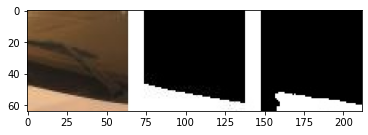

mirror_front_left#13#62B146A8-BDE0-45D7-892E-86B8E9192B26.jpg


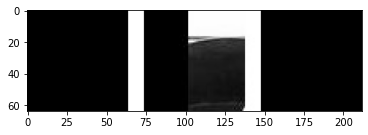

bumper#16#358D7281-ACE1-4C7B-B4A8-85875C1DF000.jpg


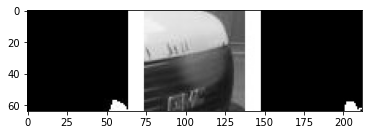

fender_front_right#58#C7BB6A9C-62B3-446D-96E2-F4D9497B3C08.jpg


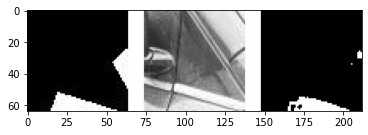

panel_roof#15#71B4E8D3-5CBA-45B3-99B2-85CAB1804BE0.jpg


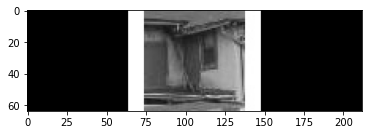

tyre_rear_right#5#181B8F01-75A0-4B32-8490-4ED2BD94C20D.jpg


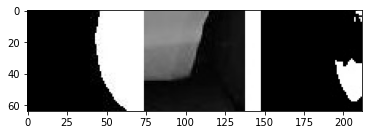

rear_bumper#40#E3DC9850-9778-4FAF-A9E1-1FCB807600ED.jpg


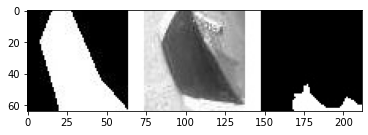

trunk_cover#59#DC2F0F8B-70DA-44C0-8D73-DAEB62CDE51A.jpg


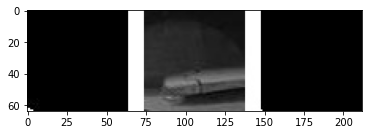

fender_front_left#44#347FC3CA-605B-4192-8DC7-C637D969A132.jpg


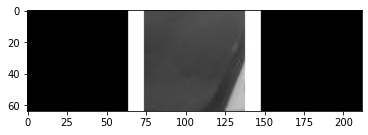

tail_light_right#5#A6308C53-2F83-45E6-AB05-1B292024CF53.jpg


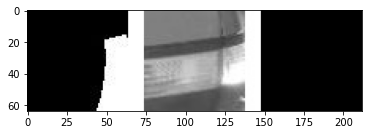

rear_bumper#22#D4E801B0-1AD1-4A53-9970-40D715F0B968.jpg


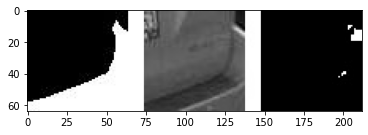

bumper#0#3B2ACF3A-765E-403E-8398-B76855452499.jpg


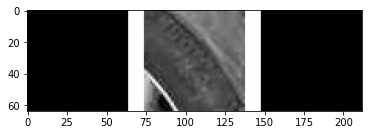

tyre_rear_right#3#car#127.jpg


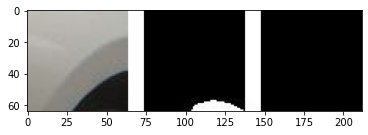

rear_windshield#11#94648466-190D-4BF1-A624-B3294178228F.jpg


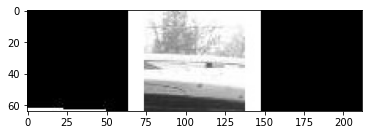

fender_front_left#16#car#72.jpg


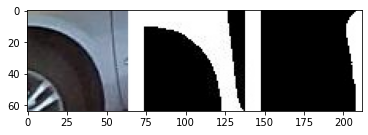

panel_roof#4#DAEBD8FA-099E-487A-8360-E79326B991DE.jpg


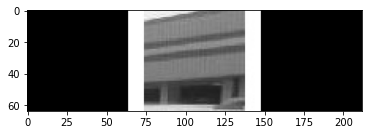

rear_bumper#37#car#96.jpg


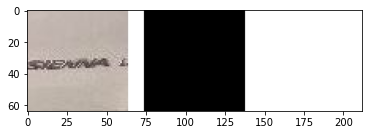

In [4]:
for i in range(0,20):
    print(res_file[i])
    plt.imshow(cv2.imread(res_path + res_file[i]))
    plt.show()

In [9]:
cv2.imread(res_path + res_file[i]).shape

(64, 212, 3)

In [16]:
def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [17]:
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope

with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
    model = tf.keras.models.load_model(r"/home/cgiuser/rushikesh/projects/boundry_patch_refinement/code/script/train1/train1_model.h5")
model.summary()

Model: "ResNet50_U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 24, 24, 64)   256         conv1_conv[0][0]                 
_____________________________________________________________________________________